## Bug when convolving (conv2d) images of certain sizes

### Windows 7 Professional, Service Pack 1, GPU: Nvidia Titan X (Pascal)

In [85]:
# creating a checkerboard image for demonstration

import numpy as np
w = 3676
h = 1832
delta=100
data = np.zeros((h,w)).astype("float32")

for i in range(w):
    for j in range(h):
        if (((i//delta)%2==0 and(j//delta)%2==0) or ((i//delta)%2==1 and(j//delta)%2==1)):
            data[j,i]=1

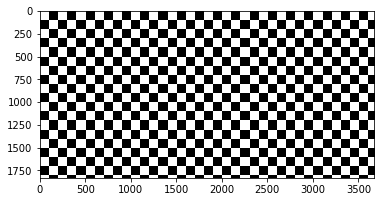

In [87]:
# showing the image

import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow(data, cmap='gray')

In [88]:
# preparing for tf convolution

import tensorflow as tf
data_tens = data[np.newaxis,...,np.newaxis]

weights = tf.Variable(tf.truncated_normal([1,1,1,1], stddev=0.1))
y = tf.nn.conv2d(data_tens, weights, [1,1,1,1], padding='SAME')

In [91]:
# evalutating the output

data_convolved = 0
with tf.Session():
    tf.global_variables_initializer().run()
    data_convolved = y.eval()

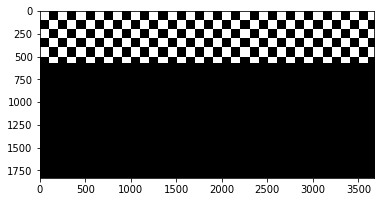

In [95]:
# plotting the convolved image 

plt.imshow(data_convolved[0,:,:,0], cmap='gray')